In [17]:
import os
import sys
import random
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
import matplotlib
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.synthetic_image import SyntheticImage
from mejiro.lenses.test import SampleStrongLens
from mejiro.exposure import Exposure
from mejiro.utils import util
from mejiro.instruments.hwo import HWO
from mejiro.analysis import stats

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

In [18]:
lens_list = util.unpickle_all('/data/bwedig/mejiro/hwo/dinos_best')
strong_lens = lens_list[0]

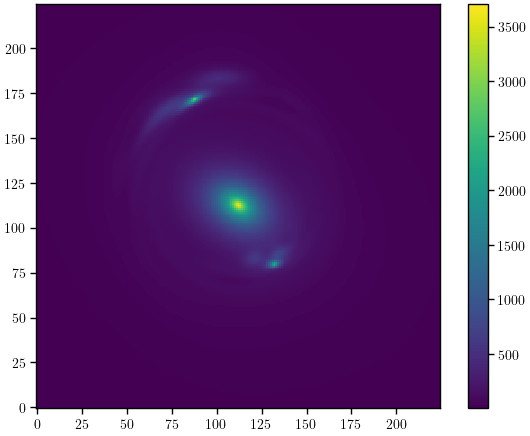

In [19]:
instrument = HWO()

kwargs_numerics = {
    'supersampling_factor': 5,
    'compute_mode': 'regular'
}
ideal_synth = SyntheticImage(strong_lens=strong_lens,
                                    instrument=instrument,
                                    band='J',
                                    arcsec=4.95,
                                    oversample=5,
                                    kwargs_numerics=kwargs_numerics,
                                    verbose=False)

engine_params = {
    'sky_background': False,
    'detector_effects': False
}
ideal_exposure = Exposure(ideal_synth,
                    exposure_time=12500,
                    engine_params=engine_params,
                    verbose=False)

plt.imshow(ideal_exposure.exposure)
plt.colorbar()
plt.show()

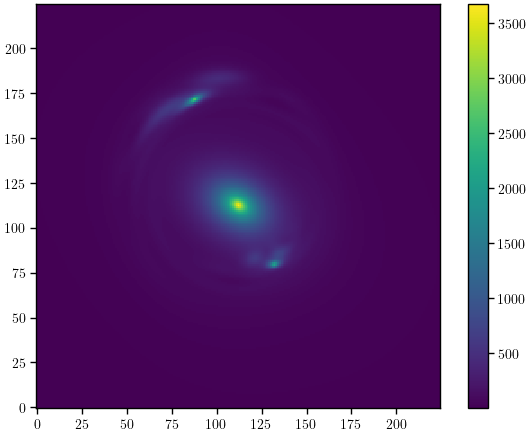

In [20]:
instrument = HWO()

kwargs_numerics = {
    'supersampling_factor': 5,
    'compute_mode': 'regular'
}
synthetic_image1 = SyntheticImage(strong_lens=strong_lens,
                                    instrument=instrument,
                                    band='J',
                                    arcsec=4.95,
                                    oversample=1,
                                    kwargs_numerics=kwargs_numerics,
                                    verbose=False)

engine_params = {
    'sky_background': False,
    'detector_effects': False
}
exposure1 = Exposure(synthetic_image1,
                    exposure_time=12500,
                    engine_params=engine_params,
                    verbose=False)

plt.imshow(exposure1.exposure)
plt.colorbar()
plt.show()

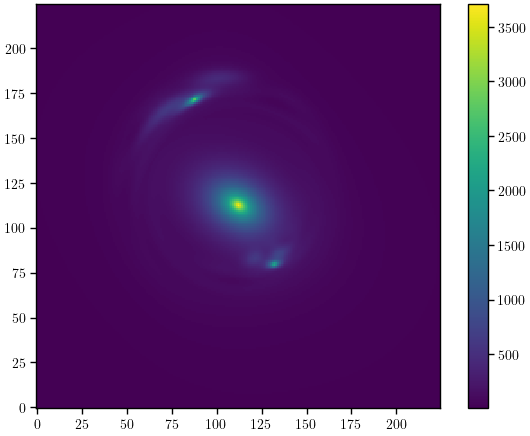

In [21]:
kwargs_numerics = {
    'supersampling_factor': 1,
    'compute_mode': 'regular'
}
synthetic_image2 = SyntheticImage(strong_lens=strong_lens,
                                    instrument=instrument,
                                    band='J',
                                    arcsec=4.95,
                                    oversample=5,
                                    kwargs_numerics=kwargs_numerics,
                                    verbose=False)

engine_params = {
    'sky_background': False,
    'detector_effects': False
}
exposure2 = Exposure(synthetic_image2,
                    exposure_time=12500,
                    engine_params=engine_params,
                    verbose=False)

plt.imshow(exposure2.exposure)
plt.colorbar()
plt.show()

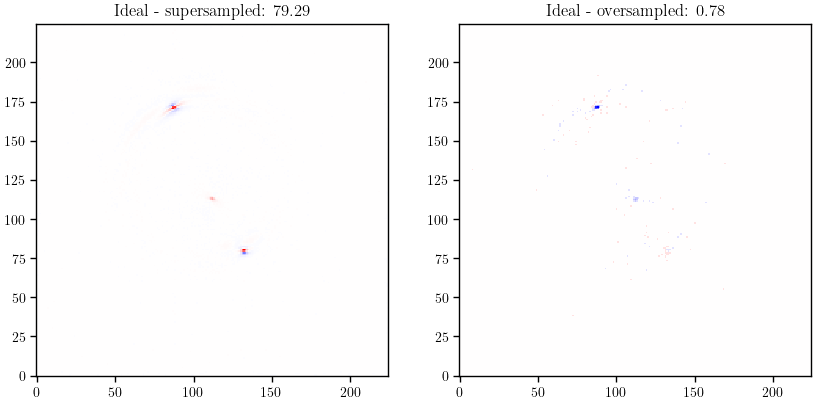

In [23]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(ideal_exposure.exposure - exposure1.exposure, 
               norm=CenteredNorm(), cmap='bwr')
ax[0].set_title(f'Ideal - supersampled: {stats.chi_square(ideal_exposure.exposure, exposure1.exposure):.2f}')
ax[1].imshow(ideal_exposure.exposure - exposure2.exposure, 
               norm=CenteredNorm(), cmap='bwr')
ax[1].set_title(f'Ideal - oversampled: {stats.chi_square(ideal_exposure.exposure, exposure2.exposure):.2f}')

plt.show()